# Método Gráfico

El método gráfico es una técnica simple para obtener una aproximación de las raíces de una ecuación. Consiste en graficar la función $f(x)$ y observar los puntos donde la curva cruza el eje x (es decir, donde $f(x)=0$).

Este método no es preciso, pero es muy útil para tener una primera estimación de la raíz, la cual puede servir como valor inicial para otros métodos numéricos más sofisticados.
### Ejemplo Sencillo

Vamos a encontrar las raíces de la función $f(x) = x^2 - 9$ en el intervalo $[0, 5]$.

Primero, importamos las librerías necesarias y definimos la función.


In [1]:
# La clase `Raices` del paquete `mnspy` nos permitirá visualizar la función fácilmente.
from mnspy import Raices
import numpy as np
from tabulate import tabulate

# se habilita los gráficos interactivos de la biblioteca Matplotlib para habilitar el zoom.
%matplotlib widget

In [2]:
# Creamos la función
def z(x):
    return x ** 2 - 9

In [3]:
# Creamos un objeto 'Raices' con la función y el intervalo a graficar.
graf = Raices(z, 0, 5)

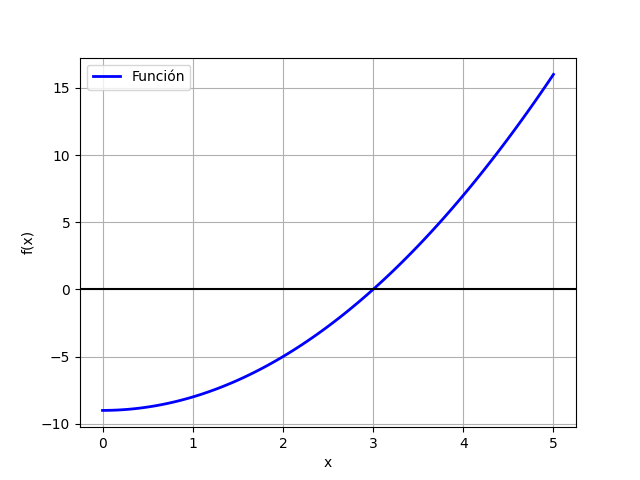

In [4]:
# se grafica la función
graf.graficar()

___
## Ejemplo 5.1
#### Métodos Numéricos Chapra 5 edición
A continuación, se resuelve el Ejemplo 5.1 del libro "Métodos Numéricos para Ingenieros" de Chapra, 5ª edición.
 
 **Problema:**

Utilice el método gráfico para determinar el coeficiente de arrastre $c$ necesario para que un paracaidista de masa $m = 68.1\,kg$ tenga una velocidad de $40\,m/s$ después de una caída libre de $t = 10\,s$. Nota: La aceleración de la gravedad es $9.8\,m/s^{2}$
$$f(c)=\dfrac{gm}{c}\left(1-e^{-(c/m)t}\right)-v$$

In [5]:
def f(c):
    m = 68.1
    v = 40
    t = 10
    g = 9.8
    return (g*m/c)*(1-np.exp(-c*t/m))-v

In [6]:
# Instanciamos la clase Raices con la nueva función y un intervalo de [4, 20].
graf = Raices(f,4,20)

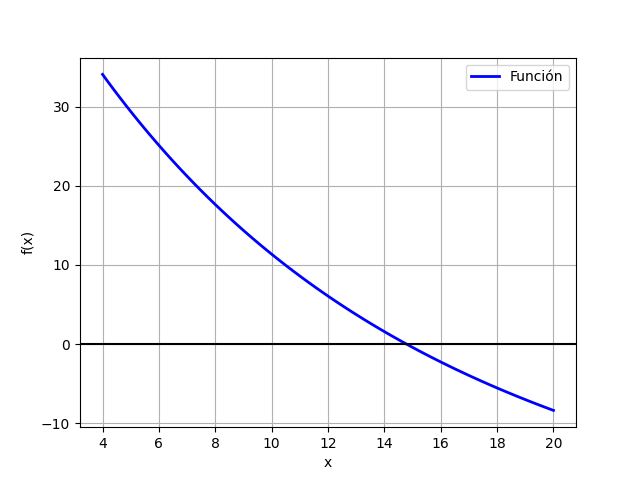

In [7]:
# Graficamos para observar dónde la función cruza el eje x.
graf.graficar()

De la gráfica, se puede observar que la raíz se encuentra entre 14 y 16. Con cierto zoom se puede obtener la solución aproximada.

### Generación de una tabla
Para tener una mejor idea de los valores, podemos generar una tabla que muestre el valor de la función $f(c)$ para diferentes valores de $c$ dentro del intervalo de interés.


In [8]:
c = np.array([4, 8, 12, 16, 20])
f_c = f(c)
tabulate({'$c$': c, '$f(c)$': f_c }, tablefmt='html', headers='keys')

$c$,$f(c)$
4,34.1148
8,17.6534
12,6.06694
16,-2.26876
20,-8.40063


A partir de la gráfica y la tabla, podemos estimar que la raíz se encuentra cerca de **14.8**.

In [9]:
'{:.3g}'.format(f(14.75))

'0.059'

### Solución usando fsolve de scipy
Finalmente, para obtener una solución numérica precisa y comparar con nuestra estimación gráfica, podemos utilizar la función `fsolve` de la biblioteca `SciPy`. Le damos un valor inicial cercano a nuestra estimación (ej. 10).
 
La solución obtenida es aproximadamente **14.7802**, lo que confirma que nuestra aproximación gráfica fue bastante buena.


In [10]:
from scipy.optimize import fsolve
fsolve(f,10)

array([14.78020383])

In [11]:
# se deshabilita los gráficos interactivos de la biblioteca Matplotlib.
%matplotlib inline